## Support Vector Machine Examples

A linearly separable dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import LinearSVC

# add pipeline to first standardize data

svm_clf = LinearSVC(loss="hinge", dual=False)


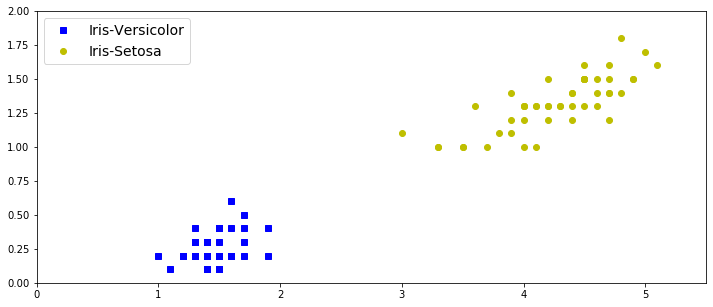

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5.0))
plt.subplot(111)
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs', label = "Iris-Versicolor")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'yo', label = "Iris-Setosa")
plt.legend(loc="upper left", fontsize=14)
plt.show()